In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [2]:
train = pd.read_csv("train.csv")
train.head(10)

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   
5      M  54.0                3             Married      Lebanon   
6      F  21.0                4             Married  Springfield   
7      F   NaN                3             Married  Springfield   
8      M  40.0                4              Single  Springfield   
9      M  45.0                3             Married      Lebanon   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   
5                 Purchasing             Conceptual             19.0   
6                 Purchasing              Directive              2.0   
7                      Sales              Directive             34.0   
8                 Production             Analytical             13.0   
9                         IT              Directive             21.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   
5                     1           21            2           5        9.0   
6                     1           50            1           1        6.0   
7                     4           23            1           4        6.0   
8                     1           49            0           1        9.0   
9                     4           34            0           2        5.0   

  Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
0                     type2                3.0          0.1841  
1                     type2                4.0          0.0670  
2                     type2                1.0          0.0851  
3                     type2                1.0          0.0668  
4                     type3                3.0          0.1827  
5                     type2                1.0          0.7613  
6                     type2                2.0          0.2819  
7                     type3                2.0          0.1169  
8                     type0                4.0          0.1968  
9                     type3                4.0          0.2870

In [3]:
train.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance',
       'Attrition_rate'],
      dtype='object')

In [4]:
train.describe()

Age  Education_Level  Time_of_service  Time_since_promotion  \
count  6588.000000      7000.000000      6856.000000           7000.000000   
mean     39.622799         3.187857        13.385064              2.367143   
std      13.606920         1.065102        10.364188              1.149395   
min      19.000000         1.000000         0.000000              0.000000   
25%      27.000000         3.000000         5.000000              1.000000   
50%      37.000000         3.000000        10.000000              2.000000   
75%      52.000000         4.000000        21.000000              3.000000   
max      65.000000         5.000000        43.000000              4.000000   

       growth_rate  Travel_Rate   Post_Level    Pay_Scale  Work_Life_balance  \
count  7000.000000  7000.000000  7000.000000  6991.000000        6989.000000   
mean     47.064286     0.817857     2.798000     6.006294           2.387895   
std      15.761406     0.648205     1.163721     2.058435           1.122786   
min      20.000000     0.000000     1.000000     1.000000           1.000000   
25%      33.000000     0.000000     2.000000     5.000000           1.000000   
50%      47.000000     1.000000     3.000000     6.000000           2.000000   
75%      61.000000     1.000000     3.000000     8.000000           3.000000   
max      74.000000     2.000000     5.000000    10.000000           5.000000   

       Attrition_rate  
count     7000.000000  
mean         0.189376  
std          0.185753  
min          0.000000  
25%          0.070400  
50%          0.142650  
75%          0.235000  
max          0.995900

In [5]:
#对离散型特征进行label encoding的处理
print(train.Gender.unique())
train['Gender'] = train['Gender'].map({'F': 0,'M':1}).astype(int)
print(train.Relationship_Status.unique())
train['Relationship_Status'] = train['Relationship_Status'].map({'Married': 0,'Single':1}).astype(int)
print(train.Hometown.unique())
train['Hometown'] = train['Hometown'].map({'Franklin': 0,'Springfield':1,'Clinton':2,'Lebanon':3,'Washington':4}).astype(int)
print(train.Unit.unique())
train['Unit'] = train['Unit'].map({'IT':0,'Logistics':1 ,'Quality':2,'Human Resource Management':3, 'Purchasing':4,
 'Sales':5, 'Production':6, 'Operarions':7, 'Accounting and Finance':8, 'Marketing':9,
 'R&D':10, 'Security':11}).astype(int)
print(train.Decision_skill_possess.unique())
train['Decision_skill_possess'] = train['Decision_skill_possess'].map({'Conceptual': 0,'Analytical':1,'Behavioral':2,'Directive':3}).astype(int)
print(train.Compensation_and_Benefits.unique())
train['Compensation_and_Benefits'] = train['Compensation_and_Benefits'].map({'type0': 0,'type1':1,'type2':2,'type3':3,'type4':4}).astype(int)


['F' 'M']
['Married' 'Single']
['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']
['Conceptual' 'Analytical' 'Behavioral' 'Directive']
['type2' 'type3' 'type0' 'type4' 'type1']


In [6]:
train

Gender   Age  Education_Level  Relationship_Status  Hometown  Unit  \
0          0  42.0                4                    0         0     0   
1          1  24.0                3                    1         1     1   
2          0  58.0                3                    0         2     2   
3          0  26.0                3                    1         3     3   
4          0  31.0                1                    0         1     1   
...      ...   ...              ...                  ...       ...   ...   
6995       0  23.0                5                    0         0     7   
6996       0  44.0                1                    0         3    10   
6997       0  49.0                3                    1         1     0   
6998       0  47.0                3                    0         4     5   
6999       0  58.0                3                    0         0     0   

      Decision_skill_possess  Time_of_service  Time_since_promotion  \
0                          0              4.0                     4   
1                          1              5.0                     4   
2                          0             27.0                     3   
3                          2              4.0                     3   
4                          0              5.0                     4   
...                      ...              ...                   ...   
6995                       2              4.0                     1   
6996                       1             16.0                     2   
6997                       3             10.0                     1   
6998                       2             24.0                     1   
6999                       3             22.0                     2   

      growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0              33            1           1        7.0   
1              36            0           3        6.0   
2              51            0           2        8.0   
3              56            1           3        8.0   
4              62            1           3        2.0   
...           ...          ...         ...        ...   
6995           20            1           2        6.0   
6996           59            0           2        4.0   
6997           59            1           2        3.0   
6998           21            1           5        8.0   
6999           74            0           4        5.0   

      Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
0                             2                3.0          0.1841  
1                             2                4.0          0.0670  
2                             2                1.0          0.0851  
3                             2                1.0          0.0668  
4                             3                3.0          0.1827  
...                         ...                ...             ...  
6995                          3                3.0          0.7839  
6996                          3                3.0          0.1055  
6997                          2                4.0          0.7847  
6998                          0                2.0          0.4162  
6999                          2                3.0          0.0910  

[7000 rows x 16 columns]

In [7]:
train.isnull().any()

Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
Attrition_rate               False
dtype: bool

In [8]:
# 查看缺失值
total = train.isnull().sum().sort_values(ascending=False)
print(total)

Age                          412
Time_of_service              144
Work_Life_balance             11
Pay_Scale                      9
Gender                         0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Compensation_and_Benefits      0
Attrition_rate                 0
dtype: int64


In [9]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Time_of_service'] = train['Time_of_service'].fillna(train['Time_of_service'].median())
train['Work_Life_balance'] = train['Work_Life_balance'].fillna(train['Work_Life_balance'].median())
train['Pay_Scale'] = train['Pay_Scale'].fillna(train['Pay_Scale'].median())

In [10]:
train.isnull().any()

Gender                       False
Age                          False
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service              False
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                    False
Compensation_and_Benefits    False
Work_Life_balance            False
Attrition_rate               False
dtype: bool

In [11]:
train

Gender   Age  Education_Level  Relationship_Status  Hometown  Unit  \
0          0  42.0                4                    0         0     0   
1          1  24.0                3                    1         1     1   
2          0  58.0                3                    0         2     2   
3          0  26.0                3                    1         3     3   
4          0  31.0                1                    0         1     1   
...      ...   ...              ...                  ...       ...   ...   
6995       0  23.0                5                    0         0     7   
6996       0  44.0                1                    0         3    10   
6997       0  49.0                3                    1         1     0   
6998       0  47.0                3                    0         4     5   
6999       0  58.0                3                    0         0     0   

      Decision_skill_possess  Time_of_service  Time_since_promotion  \
0                          0              4.0                     4   
1                          1              5.0                     4   
2                          0             27.0                     3   
3                          2              4.0                     3   
4                          0              5.0                     4   
...                      ...              ...                   ...   
6995                       2              4.0                     1   
6996                       1             16.0                     2   
6997                       3             10.0                     1   
6998                       2             24.0                     1   
6999                       3             22.0                     2   

      growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0              33            1           1        7.0   
1              36            0           3        6.0   
2              51            0           2        8.0   
3              56            1           3        8.0   
4              62            1           3        2.0   
...           ...          ...         ...        ...   
6995           20            1           2        6.0   
6996           59            0           2        4.0   
6997           59            1           2        3.0   
6998           21            1           5        8.0   
6999           74            0           4        5.0   

      Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
0                             2                3.0          0.1841  
1                             2                4.0          0.0670  
2                             2                1.0          0.0851  
3                             2                1.0          0.0668  
4                             3                3.0          0.1827  
...                         ...                ...             ...  
6995                          3                3.0          0.7839  
6996                          3                3.0          0.1055  
6997                          2                4.0          0.7847  
6998                          0                2.0          0.4162  
6999                          2                3.0          0.0910  

[7000 rows x 16 columns]

In [12]:
binarizer_scaler=preprocessing.Binarizer(threshold=train['Attrition_rate'].mean()) 
Attrition_rate_tmp=binarizer_scaler.fit_transform(train['Attrition_rate'].values.reshape((train['Attrition_rate'].shape[0],1))) 
train['IS_Resignation']=Attrition_rate_tmp

In [13]:
train.head(10)

Gender        Age  Education_Level  Relationship_Status  Hometown  Unit  \
0       0  42.000000                4                    0         0     0   
1       1  24.000000                3                    1         1     1   
2       0  58.000000                3                    0         2     2   
3       0  26.000000                3                    1         3     3   
4       0  31.000000                1                    0         1     1   
5       1  54.000000                3                    0         3     4   
6       0  21.000000                4                    0         1     4   
7       0  39.622799                3                    0         1     5   
8       1  40.000000                4                    1         1     6   
9       1  45.000000                3                    0         3     0   

   Decision_skill_possess  Time_of_service  Time_since_promotion  growth_rate  \
0                       0              4.0                     4           33   
1                       1              5.0                     4           36   
2                       0             27.0                     3           51   
3                       2              4.0                     3           56   
4                       0              5.0                     4           62   
5                       0             19.0                     1           21   
6                       3              2.0                     1           50   
7                       3             34.0                     4           23   
8                       1             13.0                     1           49   
9                       3             21.0                     4           34   

   Travel_Rate  Post_Level  Pay_Scale  Compensation_and_Benefits  \
0            1           1        7.0                          2   
1            0           3        6.0                          2   
2            0           2        8.0                          2   
3            1           3        8.0                          2   
4            1           3        2.0                          3   
5            2           5        9.0                          2   
6            1           1        6.0                          2   
7            1           4        6.0                          3   
8            0           1        9.0                          0   
9            0           2        5.0                          3   

   Work_Life_balance  Attrition_rate  IS_Resignation  
0                3.0          0.1841             0.0  
1                4.0          0.0670             0.0  
2                1.0          0.0851             0.0  
3                1.0          0.0668             0.0  
4                3.0          0.1827             0.0  
5                1.0          0.7613             1.0  
6                2.0          0.2819             1.0  
7                2.0          0.1169             0.0  
8                4.0          0.1968             1.0  
9                4.0          0.2870             1.0

In [14]:
##处理偏离值

<AxesSubplot:xlabel='Unit'>

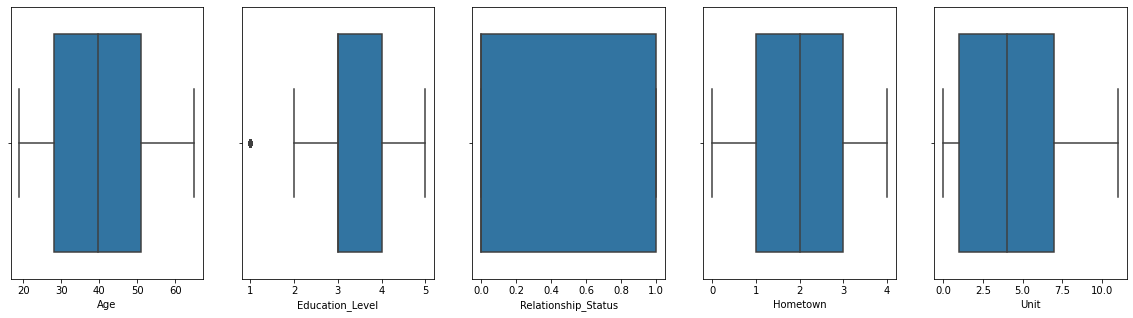

In [15]:
fig, ax = plt.subplots(1,5, figsize=(20,5 ))
sns.boxplot(x=train.columns[1], data=train, ax=ax[0])
sns.boxplot(x=train.columns[2], data=train, ax=ax[1])
sns.boxplot(x=train.columns[3], data=train, ax=ax[2])
sns.boxplot(x=train.columns[4], data=train, ax=ax[3])
sns.boxplot(x=train.columns[5], data=train, ax=ax[4])

<AxesSubplot:xlabel='Travel_Rate'>

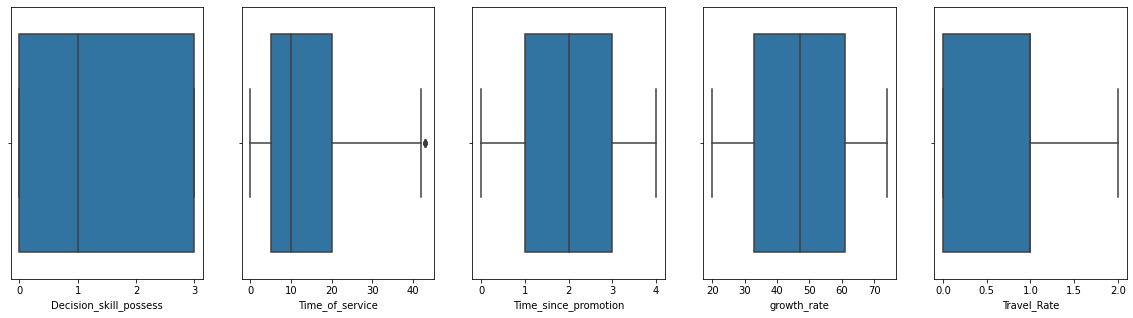

In [16]:
fig, ax = plt.subplots(1,5, figsize=(20, 5))
sns.boxplot(x=train.columns[6], data=train, ax=ax[0])
sns.boxplot(x=train.columns[7], data=train, ax=ax[1])
sns.boxplot(x=train.columns[8], data=train, ax=ax[2])
sns.boxplot(x=train.columns[9], data=train, ax=ax[3])
sns.boxplot(x=train.columns[10], data=train, ax=ax[4])

<AxesSubplot:xlabel='Attrition_rate'>

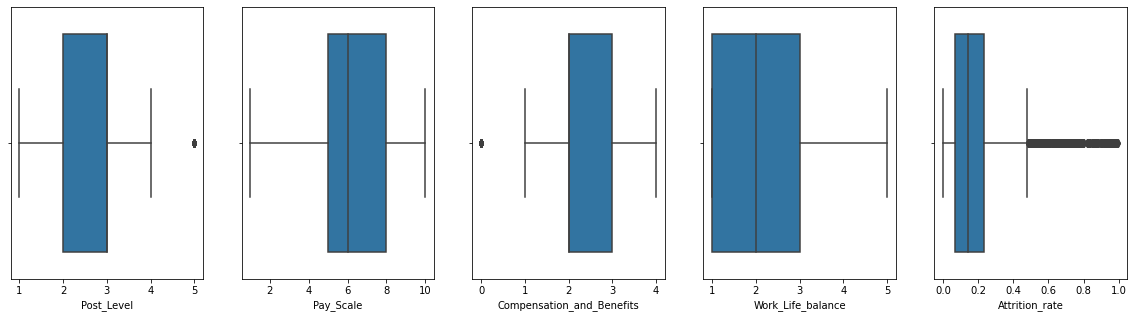

In [17]:
fig, ax = plt.subplots(1,5, figsize=(20, 5))
sns.boxplot(x=train.columns[11], data=train, ax=ax[0])
sns.boxplot(x=train.columns[12], data=train, ax=ax[1])
sns.boxplot(x=train.columns[13], data=train, ax=ax[2])
sns.boxplot(x=train.columns[14], data=train, ax=ax[3])
sns.boxplot(x=train.columns[15], data=train, ax=ax[4])

通过分析箱型图发现 education_level,Time_of_service, post_level,compensation_and_benefits存在异常值。接下来处理异常值

处理education_level异常值

In [18]:
train= train.drop(train[train['Education_Level'] == 1].index)

In [19]:
##处理Time_of_service异常值
train= train.drop(train[train['Time_of_service']>40].index)

In [20]:
##处理Post_Level异常值
train= train.drop(train[train['Post_Level'] == 5].index)

In [21]:
##处理Compensation_and_Benefits异常值
train= train.drop(train[train['Compensation_and_Benefits'] == 0].index)

In [22]:
train

Gender   Age  Education_Level  Relationship_Status  Hometown  Unit  \
0          0  42.0                4                    0         0     0   
1          1  24.0                3                    1         1     1   
2          0  58.0                3                    0         2     2   
3          0  26.0                3                    1         3     3   
6          0  21.0                4                    0         1     4   
...      ...   ...              ...                  ...       ...   ...   
6993       1  33.0                4                    0         0     1   
6994       1  33.0                3                    0         1     8   
6995       0  23.0                5                    0         0     7   
6997       0  49.0                3                    1         1     0   
6999       0  58.0                3                    0         0     0   

      Decision_skill_possess  Time_of_service  Time_since_promotion  \
0                          0              4.0                     4   
1                          1              5.0                     4   
2                          0             27.0                     3   
3                          2              4.0                     3   
6                          3              2.0                     1   
...                      ...              ...                   ...   
6993                       3              7.0                     4   
6994                       2              9.0                     3   
6995                       2              4.0                     1   
6997                       3             10.0                     1   
6999                       3             22.0                     2   

      growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0              33            1           1        7.0   
1              36            0           3        6.0   
2              51            0           2        8.0   
3              56            1           3        8.0   
6              50            1           1        6.0   
...           ...          ...         ...        ...   
6993           66            2           4        6.0   
6994           34            0           1        8.0   
6995           20            1           2        6.0   
6997           59            1           2        3.0   
6999           74            0           4        5.0   

      Compensation_and_Benefits  Work_Life_balance  Attrition_rate  \
0                             2                3.0          0.1841   
1                             2                4.0          0.0670   
2                             2                1.0          0.0851   
3                             2                1.0          0.0668   
6                             2                2.0          0.2819   
...                         ...                ...             ...   
6993                          3                2.0          0.2569   
6994                          2                4.0          0.0480   
6995                          3                3.0          0.7839   
6997                          2                4.0          0.7847   
6999                          2                3.0          0.0910   

      IS_Resignation  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
6                1.0  
...              ...  
6993             1.0  
6994             0.0  
6995             1.0  
6997             1.0  
6999             0.0  

[5485 rows x 17 columns]

In [23]:
#finished data preprocessing

In [24]:
train_2 = train.drop(['IS_Resignation'], axis=1)

In [25]:
train_2.head()

Gender   Age  Education_Level  Relationship_Status  Hometown  Unit  \
0       0  42.0                4                    0         0     0   
1       1  24.0                3                    1         1     1   
2       0  58.0                3                    0         2     2   
3       0  26.0                3                    1         3     3   
6       0  21.0                4                    0         1     4   

   Decision_skill_possess  Time_of_service  Time_since_promotion  growth_rate  \
0                       0              4.0                     4           33   
1                       1              5.0                     4           36   
2                       0             27.0                     3           51   
3                       2              4.0                     3           56   
6                       3              2.0                     1           50   

   Travel_Rate  Post_Level  Pay_Scale  Compensation_and_Benefits  \
0            1           1        7.0                          2   
1            0           3        6.0                          2   
2            0           2        8.0                          2   
3            1           3        8.0                          2   
6            1           1        6.0                          2   

   Work_Life_balance  Attrition_rate  
0                3.0          0.1841  
1                4.0          0.0670  
2                1.0          0.0851  
3                1.0          0.0668  
6                2.0          0.2819

correlation analysis

Gender                       0.019676
Age                         -0.016955
Education_Level             -0.002804
Relationship_Status          0.004185
Hometown                    -0.005599
Unit                         0.032870
Decision_skill_possess      -0.002399
Time_of_service             -0.016763
Time_since_promotion         0.012359
growth_rate                  0.024039
Travel_Rate                 -0.007062
Post_Level                   0.008446
Pay_Scale                   -0.003060
Compensation_and_Benefits   -0.015795
Work_Life_balance            0.029641
Attrition_rate               1.000000
Name: Attrition_rate, dtype: float64


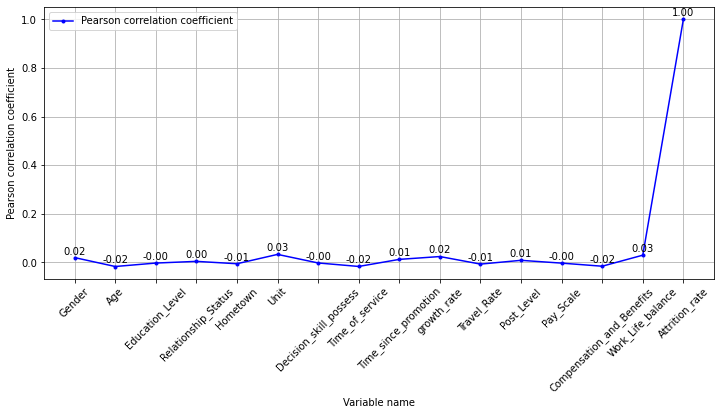

In [26]:
print(train_2.corr()['Attrition_rate'])
x = train_2.corr()['Attrition_rate'].index
y = train_2.corr()['Attrition_rate'].values
plt.figure(figsize=(12,5))
plt.plot(x,y, 'b.-',label="Pearson correlation coefficient")
plt.legend()
plt.ylabel("Pearson correlation coefficient")
plt.xlabel("Variable name")
plt.xticks(rotation=45)
plt.grid()
for i,j in zip(x,y):
  plt.text(i,j+0.005,'%.2f' %(j),ha='center',va='bottom')

Text(0.5, 1.0, 'Proportion of resignation')

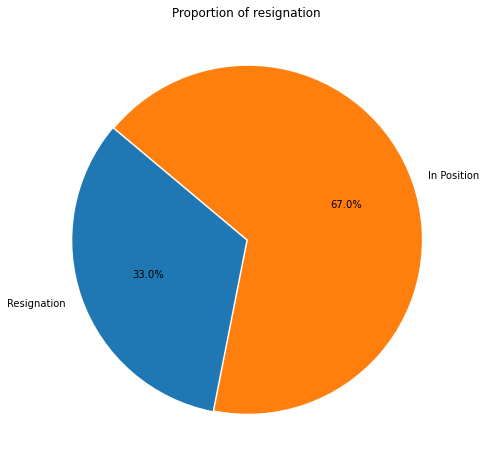

In [27]:
plt.figure(figsize=(18,8))
labels = ['Resignation', 'In Position']
sizes = [sum(train['IS_Resignation'] == 1), sum(train['IS_Resignation'] == 0)]
explode = (0, 0.01)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=500)
plt.title("Proportion of resignation")

The number of resignation: 1811
, Payroll: 3674

In [28]:
from pyecharts import options as opts
from pyecharts.charts import Bar,Pie, Grid
project_left_2 = train[train.IS_Resignation==1].groupby('Gender')['IS_Resignation'].count()
project_all = train.groupby('Gender')['IS_Resignation'].count()
# 分别计算离职人数和在职人数所占比例
project_left1_rate = project_left_2/project_all
project_left0_rate = 1-project_left1_rate


bar = (
    Bar()
    .add_xaxis(project_all.index.tolist())
    .add_yaxis('Resignation', project_left1_rate.values.reshape(2,).tolist(), stack="stack1")
    .add_yaxis('In Position', project_left0_rate.values.reshape(2,).tolist(), stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(title_opts=opts.TitleOpts(title="Gender and Resignation"))
)

bar.render_notebook()

In [29]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Time_since_promotion')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Time_since_promotion')['IS_Resignation'].count()
time_all = train.groupby('Time_since_promotion')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all
time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
x = time_left_1_rate.index.tolist()
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation percentage",
            type_="value",
            min_=0,
            max_=0.7,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value} "),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Time_since prmotion"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            name="Number of people",
            type_="value",
            min_=0,
            max_=2000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
#             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)

line = (
    Line()
    .add_xaxis(x_data)
    .add_yaxis(
        series_name="Resignation percentage",
        yaxis_index=1,
        y_axis= y_left_rate,
        label_opts=opts.LabelOpts(is_show=True),
    )
)
    
bar.overlap(line).render_notebook()


In [30]:
# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Education_Level')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Education_Level')['IS_Resignation'].count()
time_all = train.groupby('Education_Level')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all
time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
x = time_left_1_rate.index.tolist()
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation percentage",
            type_="value",
            min_=0,
            max_=0.7,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value} "),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Eduction Level"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            name="Number of people",
            type_="value",
            min_=0,
            max_=2000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
#             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)

line = (
    Line()
    .add_xaxis(x_data)
    .add_yaxis(
        series_name="Resignation perccentage",
        yaxis_index=1,
        y_axis= y_left_rate,
        label_opts=opts.LabelOpts(is_show=True),
    )
)
    
bar.overlap(line).render_notebook()


<ipython-input-31-29b041db1fef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_dist['age_range']=pd.cut(age_dist['Age'],bins=[18,30,42,54,66],include_lowest=True,right=False,\


Text(0.5, 0, 'Generation')

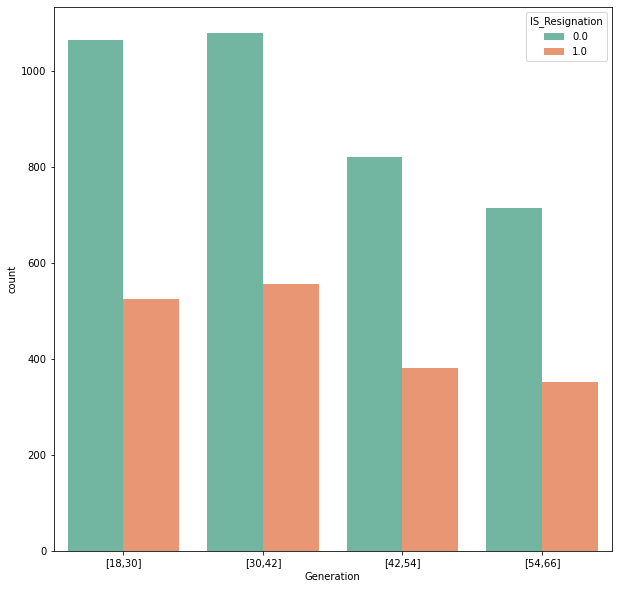

In [31]:
fig,axes=plt.subplots(1,1,figsize=(10,10))
age_dist=train[['Age','IS_Resignation']]
age_dist['age_range']=pd.cut(age_dist['Age'],bins=[18,30,42,54,66],include_lowest=True,right=False,\
                             labels=['[18,30]','[30,42]','[42,54]','[54,66]'])
 
sns.countplot(x='age_range',hue='IS_Resignation',data=age_dist,palette="Set2").set_xlabel("Generation")

<ipython-input-32-526b57123322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_dist['age_range']=pd.cut(age_dist['Time_of_service'],bins=[0,10,20,30,40,50],include_lowest=True,right=False,\


Text(0.5, 0, 'Year of Work')

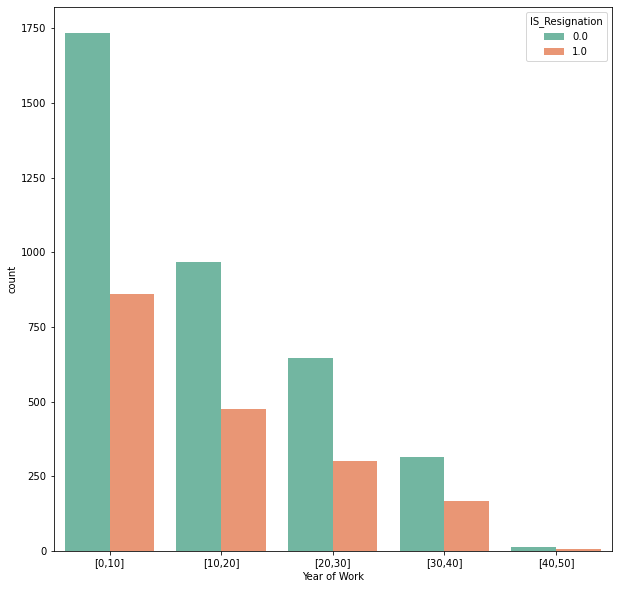

In [32]:
fig,axes=plt.subplots(1,1,figsize=(10,10))
age_dist=train[['Time_of_service','IS_Resignation']]
age_dist['age_range']=pd.cut(age_dist['Time_of_service'],bins=[0,10,20,30,40,50],include_lowest=True,right=False,\
                             labels=['[0,10]','[10,20]','[20,30]','[30,40]','[40,50]'])
sns.countplot(x='age_range',hue='IS_Resignation',data=age_dist,palette="Set2").set_xlabel("Year of Work")

In [33]:
pay_1 = train[train.IS_Resignation==1].groupby('Pay_Scale')['IS_Resignation'].count()
pay_0 = train[train.IS_Resignation==0].groupby('Pay_Scale')['IS_Resignation'].count()
pay_all = train.groupby('Pay_Scale')['IS_Resignation'].count()
y_stay_num = pay_0.values.tolist()
y_left_num = pay_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
pay_left_1_rate = pay_1/pay_all
pay_left_1_rate = pay_left_1_rate.fillna(0)
pay_left_1_rate =pay_left_1_rate.map(lambda x: round(x,2))
y_left_rate = pay_left_1_rate.values.tolist()

# 调整X轴标签格式
x = pay_left_1_rate.index.tolist()
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation percentage",
            type_="value",
            min_=0,
            max_=0.7,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value} "),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Pay Scale"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            name="Number of people",
            type_="value",
            min_=0,
            max_=1500,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
           splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)

line = (
    Line()
    .add_xaxis(x_data)
    .add_yaxis(
        series_name="Resignation percentage",
        yaxis_index=1,
        y_axis= y_left_rate,
        label_opts=opts.LabelOpts(is_show=True),
    )
)
    
bar.overlap(line).render_notebook()


In [34]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Unit')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Unit')['IS_Resignation'].count()
time_all = train.groupby('Unit')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all
time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
x = time_left_1_rate.index.tolist()
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Unit"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


IT: 0, Logistics: 1 ,Quality: 2, Human Resource Management: 3, Purchasing: 4,
 Sales: 5, Production: 6, Operarions: 7, Accounting and Finance: 8, Marketing: 9,
 R&D: 10, Security: 11

In [35]:
project_left_2 = train[train.IS_Resignation==1].groupby('Relationship_Status')['IS_Resignation'].count()
project_all = train.groupby('Relationship_Status')['IS_Resignation'].count()
# 分别计算离职人数和在职人数所占比例
project_left1_rate = project_left_2/project_all
project_left0_rate = 1-project_left1_rate

x = ['Single','Married']   
x_data =[str(i) for i in x]


bar = (
    Bar()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis('Resignation', project_left1_rate.values.reshape(2,).tolist(), stack="stack1")
    .add_yaxis('Payroll', project_left0_rate.values.reshape(2,).tolist(), stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(title_opts=opts.TitleOpts(title="Relationship_Status"))
)

bar.render_notebook()

In [36]:
train.Decision_skill_possess.unique()

array([0, 1, 2, 3])

In [37]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Decision_skill_possess')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Decision_skill_possess')['IS_Resignation'].count()
time_all = train.groupby('Decision_skill_possess')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all
time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
x = ['Conceptual','Analytical','Behavioral','Directive']   # x_label
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Decision_skill_possess"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


<ipython-input-38-7ded9bd37862>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_dist['age_range']=pd.cut(gr_dist['growth_rate'],bins=[20,30,40,50,60,70,80],include_lowest=True,right=False,\


Text(0.5, 0, 'Growth_rate')

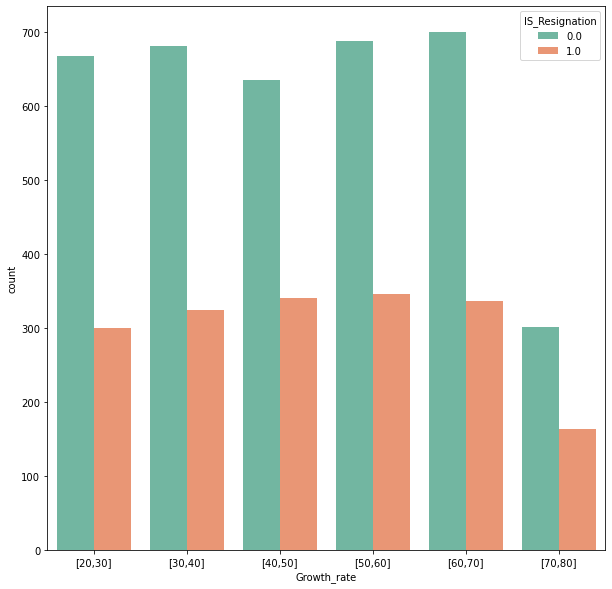

In [38]:
fig,axes=plt.subplots(1,1,figsize=(10,10))
gr_dist=train[['growth_rate','IS_Resignation']]
gr_dist['age_range']=pd.cut(gr_dist['growth_rate'],bins=[20,30,40,50,60,70,80],include_lowest=True,right=False,\
                             labels=['[20,30]','[30,40]','[40,50]','[50,60]','[60,70]','[70,80]'])
sns.countplot(x='age_range',hue='IS_Resignation',data=gr_dist,palette="Set2").set_xlabel("Growth_rate")

In [39]:
# train.Travel_Rate.describe()
train.Travel_Rate.unique()

array([1, 0, 2])

In [40]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Travel_Rate')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Travel_Rate')['IS_Resignation'].count()
time_all = train.groupby('Travel_Rate')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all
time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
#x = ['Seldom','Never','Often']   # x_label
x = time_left_1_rate.index.tolist()
x = ['Never','Seldom','Often']
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Travel_Rate"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


In [41]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Post_Level')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Post_Level')['IS_Resignation'].count()
time_all = train.groupby('Post_Level')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all

time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
#x = ['1','3','2','4']   # x_label
x = time_left_1_rate.index.tolist()
x = ['Intership','Junior','Intermediate','Senior']
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Post_Level"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


In [42]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Compensation_and_Benefits')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Compensation_and_Benefits')['IS_Resignation'].count()
time_all = train.groupby('Compensation_and_Benefits')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all

time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
#x = ['1','3','2','4']   # x_label
x = time_left_1_rate.index.tolist()
x = ['Worse','Bad','Good','Best']
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Compensation_and_Benefits"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


In [43]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts.charts import Line

# 计算离职人数和在职人数
time_left_1 = train[train.IS_Resignation==1].groupby('Work_Life_balance')['IS_Resignation'].count()
time_left_0 = train[train.IS_Resignation==0].groupby('Work_Life_balance')['IS_Resignation'].count()
time_all = train.groupby('Work_Life_balance')['IS_Resignation'].count()
y_stay_num = time_left_0.values.tolist()
y_left_num = time_left_1.values.tolist()

# 分别计算离职人数和在职人数所占比例
time_left_1_rate = time_left_1/time_all

time_left_1_rate = time_left_1_rate.fillna(0)
time_left_1_rate = time_left_1_rate.map(lambda x: round(x,2))
y_left_rate = time_left_1_rate.values.tolist()

# 调整X轴标签格式
#x = ['1','3','2','4']   # x_label
x = time_left_1_rate.index.tolist()
x = ['Worse','Bad','Normal','Good','Best']
x_data =[str(i) for i in x] # 转化为字符串格式,作为x轴,否则会错位

bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="Number of resignation",
        y_axis=y_left_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .add_yaxis(
        series_name="Number of employees",
        y_axis=y_stay_num,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Resignation Percentage",
            type_="value",
            min_=0,
            max_=0.5,
            interval=0.1,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Work_Life_balance"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        yaxis_opts=opts.AxisOpts(
            #name="Number of people",
            name="Number of people",
            min_=0,
            max_=3000,
            interval=500,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
             splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
         
    )
)

scatter = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis(series_name = "Resignation Percentage",
               yaxis_index=1,
               y_axis=[round(i,2) for i in time_left_1_rate.values.tolist()],
               symbol=SymbolType.ARROW,
               label_opts=opts.LabelOpts(is_show=True),
              )
)
bar.overlap(scatter).render_notebook()


In [44]:
from sklearn import tree
from sklearn.model_selection import train_test_split
#split train and test set
train_train, train_test = train_test_split(train, test_size=0.3)
train_train.head(10)

Gender   Age  Education_Level  Relationship_Status  Hometown  Unit  \
2126       1  36.0                3                    0         1     1   
1502       1  46.0                2                    0         0     7   
1728       1  28.0                3                    1         3     2   
912        0  64.0                3                    1         3     7   
5361       1  60.0                3                    0         0     0   
4374       1  35.0                3                    1         1     7   
2884       1  64.0                4                    1         4     1   
2360       1  34.0                3                    0         1     1   
5791       0  26.0                3                    0         3     8   
6229       0  35.0                4                    0         3     4   

      Decision_skill_possess  Time_of_service  Time_since_promotion  \
2126                       2             12.0                     2   
1502                       2             20.0                     3   
1728                       0              5.0                     4   
912                        2             25.0                     1   
5361                       0             37.0                     2   
4374                       3             10.0                     1   
2884                       0             10.0                     2   
2360                       0             11.0                     3   
5791                       1              4.0                     4   
6229                       1              7.0                     1   

      growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
2126           24            0           1        3.0   
1502           71            1           2        2.0   
1728           34            1           4       10.0   
912            47            1           3        4.0   
5361           46            0           3        8.0   
4374           58            0           3        4.0   
2884           20            1           3        4.0   
2360           26            0           4        6.0   
5791           73            1           2        6.0   
6229           50            0           1        4.0   

      Compensation_and_Benefits  Work_Life_balance  Attrition_rate  \
2126                          2                3.0          0.4688   
1502                          2                2.0          0.1287   
1728                          2                4.0          0.2816   
912                           2                2.0          0.2655   
5361                          2                1.0          0.2790   
4374                          2                3.0          0.0475   
2884                          3                3.0          0.0013   
2360                          3                4.0          0.1299   
5791                          4                2.0          0.0216   
6229                          3                3.0          0.1540   

      IS_Resignation  
2126             1.0  
1502             0.0  
1728             1.0  
912              1.0  
5361             1.0  
4374             0.0  
2884             0.0  
2360             0.0  
5791             0.0  
6229             0.0

In [45]:
x_train = train_train.drop(['IS_Resignation','Attrition_rate'],axis=1)
x_train

Gender        Age  Education_Level  Relationship_Status  Hometown  Unit  \
2126       1  36.000000                3                    0         1     1   
1502       1  46.000000                2                    0         0     7   
1728       1  28.000000                3                    1         3     2   
912        0  64.000000                3                    1         3     7   
5361       1  60.000000                3                    0         0     0   
...      ...        ...              ...                  ...       ...   ...   
6313       1  20.000000                4                    0         3     1   
3193       0  24.000000                4                    0         4     5   
6986       1  39.622799                4                    1         0     3   
2809       0  21.000000                2                    0         4     1   
1616       0  47.000000                3                    0         0     4   

      Decision_skill_possess  Time_of_service  Time_since_promotion  \
2126                       2             12.0                     2   
1502                       2             20.0                     3   
1728                       0              5.0                     4   
912                        2             25.0                     1   
5361                       0             37.0                     2   
...                      ...              ...                   ...   
6313                       2              1.0                     1   
3193                       2              5.0                     1   
6986                       3              3.0                     1   
2809                       0              2.0                     2   
1616                       0             11.0                     2   

      growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
2126           24            0           1        3.0   
1502           71            1           2        2.0   
1728           34            1           4       10.0   
912            47            1           3        4.0   
5361           46            0           3        8.0   
...           ...          ...         ...        ...   
6313           28            0           1        8.0   
3193           34            2           1        1.0   
6986           59            0           2        5.0   
2809           53            0           2        5.0   
1616           70            1           3        7.0   

      Compensation_and_Benefits  Work_Life_balance  
2126                          2                3.0  
1502                          2                2.0  
1728                          2                4.0  
912                           2                2.0  
5361                          2                1.0  
...                         ...                ...  
6313                          2                1.0  
3193                          2                3.0  
6986                          2                2.0  
2809                          2                1.0  
1616                          3                3.0  

[3839 rows x 15 columns]

In [46]:
y_train = train_train.iloc[:,16]
y_train

2126    1.0
1502    0.0
1728    1.0
912     1.0
5361    1.0
       ... 
6313    1.0
3193    0.0
6986    0.0
2809    0.0
1616    0.0
Name: IS_Resignation, Length: 3839, dtype: float64

In [47]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)

In [48]:
x_test = train_test.drop(['IS_Resignation','Attrition_rate'],axis=1).values
x_test

array([[ 0., 22.,  3., ..., 10.,  2.,  4.],
       [ 1., 46.,  3., ..., 10.,  2.,  3.],
       [ 0., 52.,  3., ...,  9.,  2.,  3.],
       ...,
       [ 0., 32.,  2., ..., 10.,  3.,  4.],
       [ 0., 20.,  4., ..., 10.,  2.,  3.],
       [ 0., 22.,  3., ...,  5.,  3.,  1.]])

In [49]:
y_test = train_test.iloc[:,16].values
y_test

array([0., 1., 1., ..., 0., 0., 0.])

In [50]:
result = clf.score(x_test,y_test)
result

0.6421628189550426

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [66]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
gsearch1.fit(x_train, y_train)

#print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 21}
best accuracy:0.512420


In [67]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=31,
                        random_state=10),
                        param_grid = param_test2,scoring='roc_auc',cv=10)
gsearch1.fit(x_train, y_train)
#print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

{'max_features': 2}
best accuracy:0.508872


In [68]:
param_test3 = {"max_depth":range(1,21,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=31,
                        max_features=5, random_state=10),
                        param_grid = param_test3,scoring='roc_auc',cv=10)
gsearch1.fit(x_train, y_train)
#print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

{'max_depth': 16}
best accuracy:0.512129


In [69]:
param_test4 = {'min_samples_split':range(1,20,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=31,
                        max_features=5, max_depth=16, random_state=10),
                        param_grid = param_test4,scoring='roc_auc',cv=10)
gsearch1.fit(x_train, y_train)
#print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)


/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel

{'min_samples_split': 2}
best accuracy:0.512129


/Users/choihot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.51212889 0.48994025 0.50388441 0.49410671 0.49392122
 0.50754331 0.4871217  0.49447572 0.50430594 0.49275978 0.49752058
 0.50511896 0.49116044 0.50088434 0.49146895 0.50112448 0.50089669
 0.49529365]
  warnings.warn(


In [57]:
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=31, 
    max_features=5,
    max_depth=16, # 定义树的深度, 可以用来防止过拟合
    min_samples_split=10,# 定义至少多少个样本的情况下才继续分叉
    random_state=10
    #min_weight_fraction_leaf=0.02 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )
rf.fit(x_train, y_train)
print ("\n\n ---随机森林---")
result2 = rf.score(x_test,y_test)
print(result2)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
print ("随机森林 AUC = %.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))



 ---随机森林---
0.660996354799514
随机森林 AUC = 0.51
              precision    recall  f1-score   support

         0.0       0.67      0.97      0.79      1100
         1.0       0.40      0.05      0.08       546

    accuracy                           0.66      1646
   macro avg       0.54      0.51      0.44      1646
weighted avg       0.58      0.66      0.56      1646



In [58]:
print ("\n\n ---决策树---")
dt_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
print ("决策树 AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, clf.predict(x_test)))



 ---决策树---
决策树 AUC = 0.50
              precision    recall  f1-score   support

         0.0       0.67      0.93      0.78      1100
         1.0       0.31      0.07      0.11       546

    accuracy                           0.64      1646
   macro avg       0.49      0.50      0.44      1646
weighted avg       0.55      0.64      0.55      1646



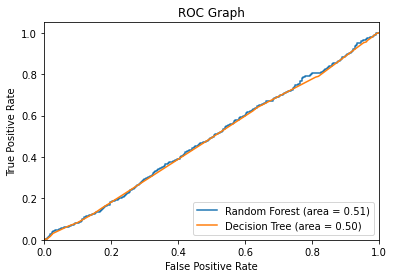

In [59]:
# ROC 图
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

plt.figure()

# 随机森林 ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# 决策树 ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

[0.         0.13026745 0.0253141  0.02203035 0.02548648 0.10430245
 0.0719759  0.2071217  0.05652149 0.2187256  0.02010855 0.
 0.02048093 0.         0.09766499]


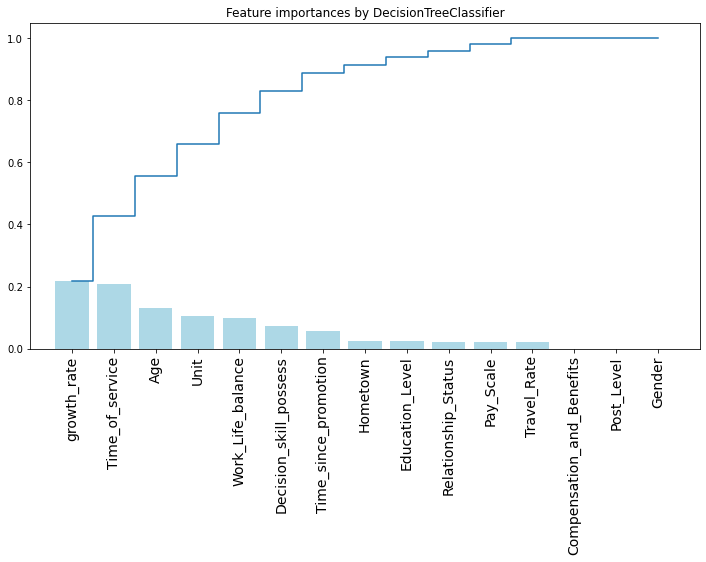

In [60]:
## 画出决策树特征的重要性 ##
importances = clf.feature_importances_
feat_names = train.drop(['IS_Resignation','Attrition_rate'],axis=1).columns
print(importances)

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

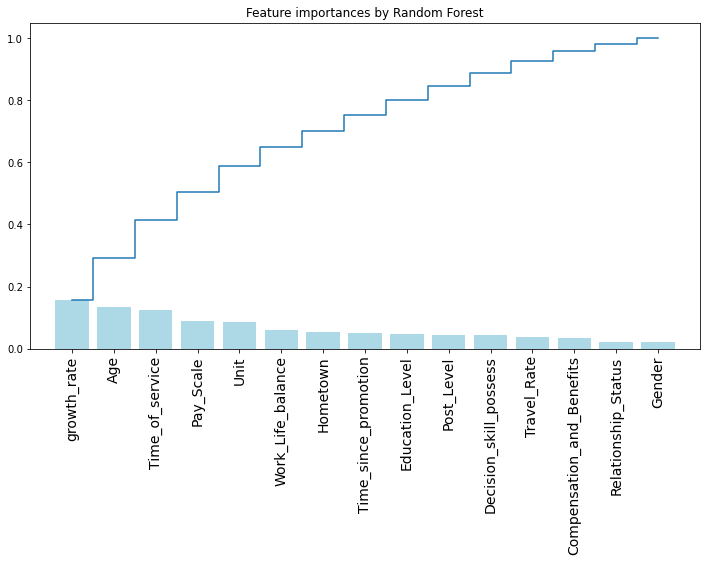

In [61]:
## 画出随机森林的特征的重要性 ##
importances = rf.feature_importances_
feat_names = train.drop(['IS_Resignation','Attrition_rate'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (48,48), dpi=500)
tree.plot_tree(clf,filled = True);